In [2]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import string
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/Sea_Ice_Index_Daily_Extent_G02135_v3.0_new.xlsx',)

# df.drop(index=59,inplace=True)
df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

df[df.isnull()] = np.nan

df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,NaN,...,12.959,13.011,13.073,12.721,12.643,12.484,12.934,13.046,12.702,13.302
1,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,14.305,...,12.961,13.103,13.125,12.806,12.644,12.600,12.992,13.072,12.671,13.438
2,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,NaN,...,13.012,13.116,13.112,12.790,12.713,12.634,12.980,13.170,12.704,13.411
3,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,14.417,...,13.045,13.219,13.051,12.829,12.954,12.724,13.045,13.193,12.770,13.436
4,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,NaN,...,13.065,13.148,13.115,12.874,12.956,12.834,13.147,13.166,12.814,13.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.383,NaN,NaN,13.953,NaN,13.664,13.394,NaN,13.766,NaN,...,12.693,12.967,12.680,12.291,12.291,12.325,12.721,12.579,12.947,NaN
362,NaN,14.101,14.172,NaN,14.144,NaN,NaN,13.571,NaN,NaN,...,12.870,12.930,12.745,12.484,12.235,12.344,12.712,12.582,12.978,NaN
363,14.500,NaN,NaN,14.128,NaN,13.855,13.494,NaN,13.904,NaN,...,12.897,12.936,12.762,12.525,12.223,12.523,12.780,12.608,13.050,NaN
364,NaN,14.092,14.093,NaN,14.159,NaN,NaN,13.701,NaN,NaN,...,12.804,13.038,12.800,12.617,12.273,12.569,12.858,12.622,13.149,NaN


In [4]:
timeseries = []

for col in df.columns[:]:
    
    timeseries += list(df[col])
    
timeseries = np.array(timeseries)

timeseries[np.isnan(timeseries)] = np.nan

x = np.arange(len(timeseries))[~np.isnan(timeseries)]

y = timeseries[~np.isnan(timeseries)]

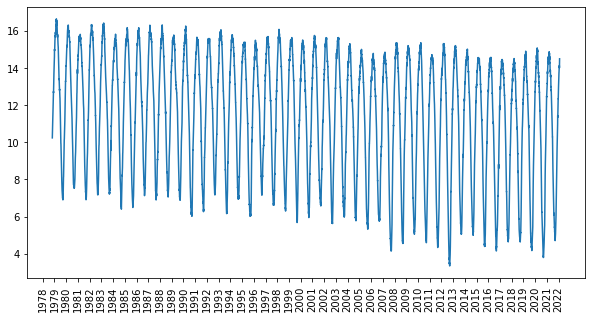

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y)

ax.set_xticks(np.arange(0,366*45,366))
ax.set_xticklabels(np.arange(1978,2023),rotation=90)

# plt.plot(np.arange(300,350),timeseries[300:350],color='k')

plt.show()

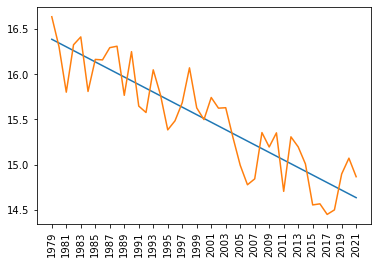

In [18]:
doy_maxs = []
years = []
specials = []

for col in df.columns:
    
    doy_min = np.max(df[col])
    doy_maxs.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = years[1:-1]
doy_maxs = doy_maxs[1:-1]

max_stats = linregress(years,doy_maxs)

plt.plot([years[0],years[-1]],[years[0]*max_stats[0]+max_stats[1],years[-1]*max_stats[0]+max_stats[1]])
    
plt.plot(years,doy_maxs)
# plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.show()

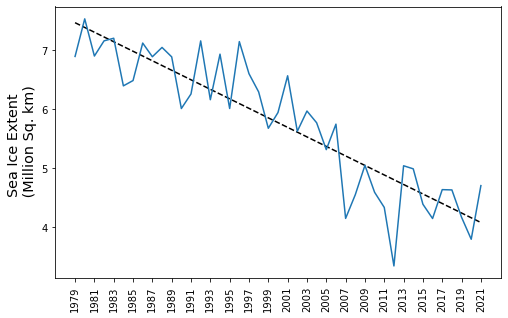

In [19]:
doy_mins = []
years = []
specials = []

for col in df.columns[:-1]:
    
    doy_min = np.min(df[col])
    doy_mins.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = years[1:]
doy_mins = doy_mins[1:]

stats = linregress(years,doy_mins)

plt.figure(figsize=(8,5))

plt.plot([years[0],years[-1]],[years[0]*stats[0]+stats[1],years[-1]*stats[0]+stats[1]],color='k', ls='--')
    
plt.plot(years,doy_mins)
# plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.ylabel('Sea Ice Extent \n (Million Sq. km)', fontsize='x-large')
plt.show()

In [20]:
stats_a = linregress(years[:21],doy_mins[:21])
stats_b = linregress(years[21:],doy_mins[21:])
# stats

Text(0, 0.5, 'Standard Deviations \n From Linear Trend')

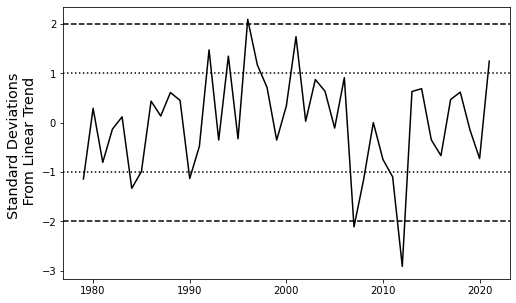

In [21]:
trendpoints = [x*stats[0] + stats[1] for x in years]

# plt.plot(years,trendpoints)
# plt.plot(years,doy_mins)


plt.figure(figsize=(8,5))

detrended = np.array(doy_mins) - np.array(trendpoints)

std = np.std(detrended)

plt.plot(years,detrended/std,color='k')

# plt.axhline(-2*std,ls='--',color='k')
# plt.axhline(2*std,ls='--',color='k')

# plt.axhline(-1*std,ls=':',color='k')
# plt.axhline(1*std,ls=':',color='k')

plt.axhline(-2,ls='--',color='k')
plt.axhline(2,ls='--',color='k')

plt.axhline(-1,ls=':',color='k')
plt.axhline(1,ls=':',color='k')

plt.ylabel('Standard Deviations \n From Linear Trend', fontsize='x-large')

Text(0, 0.5, 'Departure From Linear Trend \n (Million Sq. km)')

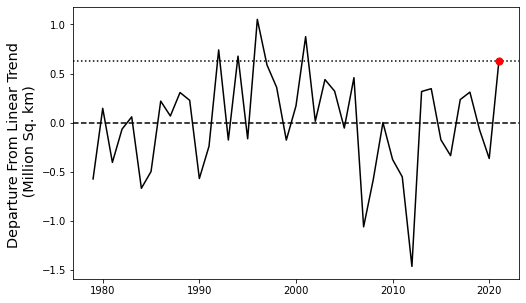

In [10]:
trendpoints = [x*stats[0] + stats[1] for x in years]

# plt.plot(years,trendpoints)
# plt.plot(years,doy_mins)


plt.figure(figsize=(8,5))

detrended = np.array(doy_mins) - np.array(trendpoints)

std = np.std(detrended)

plt.plot(years,detrended,color='k')

# plt.axhline(-2*std,ls='--',color='k')
# plt.axhline(2*std,ls='--',color='k')

# plt.axhline(-1*std,ls=':',color='k')
# plt.axhline(1*std,ls=':',color='k')

# plt.axhline(-2,ls='--',color='k')
# plt.axhline(2,ls='--',color='k')

# plt.axhline(-1,ls=':',color='k')
# plt.axhline(1,ls=':',color='k')

plt.axhline(0,ls='--',color='k')
plt.axhline(detrended[-1],ls=':',color='k')
plt.scatter([2021],detrended[-1],color='r',zorder=5,s=50)

plt.ylabel('Departure From Linear Trend \n (Million Sq. km)', fontsize='x-large')

In [11]:
list(zip(years,detrended/std))

[(1979, -1.1391664256721088),
 (1980, 0.29064842038164895),
 (1981, -0.8040187464687248),
 (1982, -0.1301559610166781),
 (1983, 0.11798645346493151),
 (1984, -1.328795225823606),
 (1985, -0.9891428250586312),
 (1986, 0.4366933259393267),
 (1987, 0.1357758227207478),
 (1988, 0.6107038553828718),
 (1989, 0.4530193741730379),
 (1990, -1.131027284540547),
 (1991, -0.47705797436749203),
 (1992, 1.473965923995919),
 (1993, -0.3507917855934739),
 (1994, 1.34758497672668),
 (1995, -0.3259823207423719),
 (1996, 2.0925382466773055),
 (1997, 1.1689549672262665),
 (1998, 0.7148577043594465),
 (1999, -0.35195859710033744),
 (2000, 0.3398083161028013),
 (2001, 1.7417722967659692),
 (2002, 0.028418048738933405),
 (2003, 0.873364721590315),
 (2004, 0.6380956867924098),
 (2005, -0.10843566267559643),
 (2006, 0.911573592630918),
 (2007, -2.108781981225915),
 (2008, -1.1504424992842783),
 (2009, 0.002853040391483324),
 (2010, -0.7456676566044228),
 (2011, -1.0963188480204815),
 (2012, -2.9111298199703786

In [12]:
import pickle
pickle.dump(detrended/std, open('anomalies.p', 'wb'))

(3.1, 11.0)

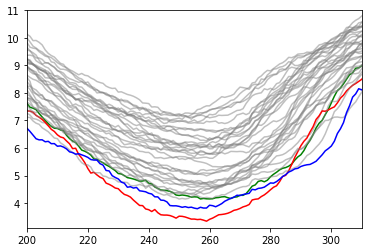

In [13]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(200,310)
plt.ylim(3.1,11)

(12.0, 17.0)

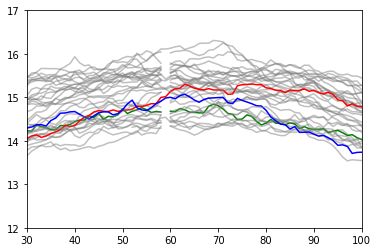

In [14]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(30,100)
plt.ylim(12,17)

# Summary plot

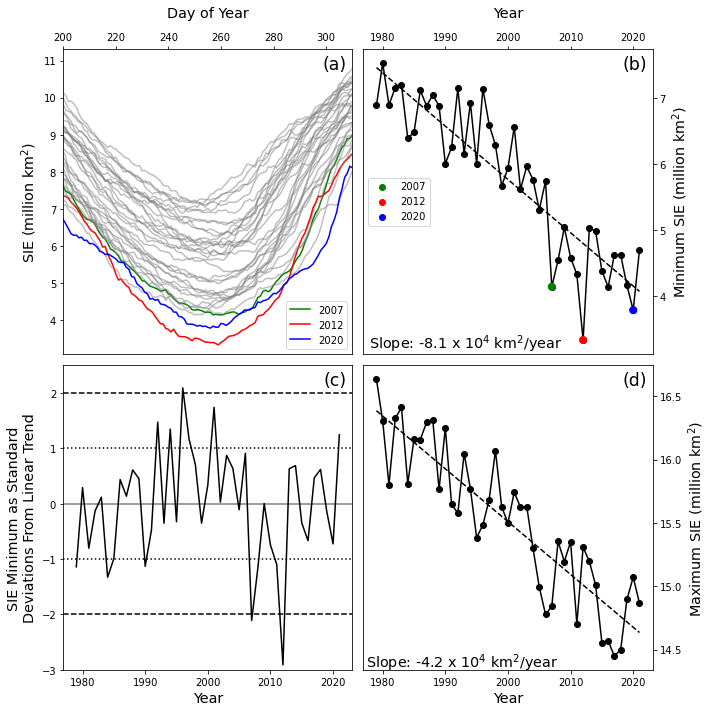

In [24]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

for ax, letter in zip(axs.reshape(-1),string.ascii_letters):
    ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.98,0.98),
                va='top',ha='right',
                xycoords='axes fraction',
                 zorder=10)

TL_ax, TR_ax, BL_ax, BR_ax = axs.reshape(-1)

#####################################

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    TL_ax.plot(df.index,df[col],color=color,alpha=alpha)

TL_ax.set_xlim(200,310)
TL_ax.set_ylim(3.1,11.3)

TL_ax.set_xlabel('Day of Year', fontsize='x-large', labelpad=15)
TL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TL_ax.plot([],[],color=color,label=str(year))
TL_ax.legend(loc='lower right')

TL_ax.xaxis.set_label_position('top') 
TL_ax.xaxis.tick_top()



#####################################

TR_ax.plot(years,doy_mins,color='k',marker='o')

TR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)


TR_ax.plot([years[0],years[-1]],[years[0]*stats[0]+stats[1],years[-1]*stats[0]+stats[1]],color='k',ls='--')

round_slope = np.round(100*stats[0],decimals=1)

TR_ax.annotate(xy=(0.02,0.02),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='left')


TR_ax.yaxis.set_label_position('right') 
TR_ax.yaxis.tick_right()

TR_ax.set_xlabel('Year', fontsize='x-large', labelpad=15)
TR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

TR_ax.xaxis.set_label_position('top') 
TR_ax.xaxis.tick_top()

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TR_ax.scatter([],[],color=color,label=str(year))
TR_ax.legend(loc='center left')

#####################################

BR_ax.plot(years,doy_maxs,color='k',marker='o')

BR_ax.plot([years[0],years[-1]],[years[0]*max_stats[0]+max_stats[1],years[-1]*max_stats[0]+max_stats[1]],color='k',ls='--')

round_slope = np.round(100*max_stats[0],decimals=1)

BR_ax.annotate(xy=(0.01,0.01),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='left')


BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Maximum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TR_ax.scatter([],[],color=color,label=str(year))


##########################################

BL_ax.set_ylim(-3,2.5)

BL_ax.plot(years,detrended/std,color='k')

BL_ax.axhline(0,color='k',alpha=0.5)

BL_ax.axhline(-2,ls='--',color='k')
BL_ax.axhline(2,ls='--',color='k')

BL_ax.axhline(-1,ls=':',color='k')
BL_ax.axhline(1,ls=':',color='k')

BL_ax.set_ylabel('SIE Minimum as Standard\nDeviations From Linear Trend', fontsize='x-large')

BL_ax.set_xlabel('Year', fontsize='x-large')

plt.subplots_adjust(wspace=0.05,hspace=0.05)

plt.tight_layout()

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'
plt.savefig(f'{data_dir}/fig4.jpg',dpi=500, bbox_inches='tight')



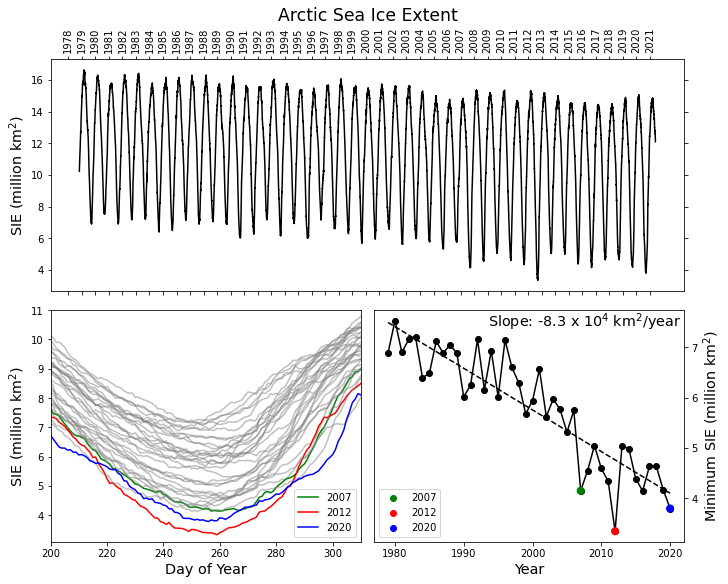

In [27]:
fig = plt.figure(constrained_layout=True,figsize=(10,8))

gs = fig.add_gridspec(2, 2)

top_ax = fig.add_subplot(gs[0, :])
top_ax.set_title('Arctic Sea Ice Extent', fontsize='xx-large')

top_ax.plot(x,y,color='k')

top_ax.set_xticks(np.arange(0,366*44,366))
top_ax.set_xticklabels(np.arange(1978,2022),rotation=90)

top_ax.xaxis.set_label_position('top') 
top_ax.xaxis.tick_top()
top_ax.yaxis.set_ticks_position('both')
top_ax.xaxis.set_ticks_position('both')


top_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')


#####################################


BL_ax = fig.add_subplot(gs[1, :-1])

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(200,310)
BL_ax.set_ylim(3.1,11)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='lower right')

#####################################

BR_ax = fig.add_subplot(gs[1:, -1])

BR_ax.plot(years,doy_mins,color='k',marker='o')

BR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)


BR_ax.plot([1979,2020],[1979*stats[0]+stats[1],2020*stats[0]+stats[1]],color='k',ls='--')

round_slope = np.round(100*stats[0],decimals=1)

BR_ax.annotate(xy=(0.99,0.93),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='right')


BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='lower left')



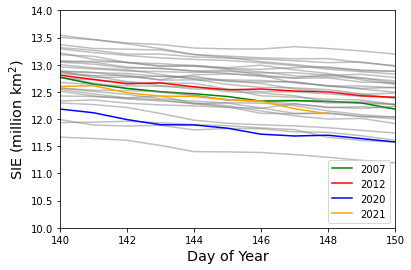

In [69]:

fig, BL_ax = plt.subplots(1,1)

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    elif col == 2021:
        color='orange'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(140,150)
BL_ax.set_ylim(10,14)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020,2021],
                       ['g','r','b','orange']):
    BL_ax.plot([],[],color=color,label=str(year))
    
BL_ax.legend(loc='lower right')
